In [ ]:
import os
os.getcwd()


In [ ]:
import pandas as pd
import random
import numpy as np
from math import radians, cos, sin, asin, sqrt
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.cm as cm

ZeroDivisionError: division by zero

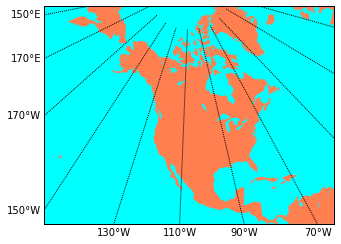

In [1]:
import pandas as pd
import random
import numpy as np
from math import radians, cos, sin, asin, sqrt
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import pandas as pd

m = Basemap(width=12000000,height=9000000,projection='lcc',resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
# label parallels on right and top
#meridians on bottom and left
parallels = np.arange(0.,81,10.)
#labels = [left,right,top,bottom]
#m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])
# plot blue dot on Boulder, colorado and label it as such.


df = pd.read_csv("C:/Users/Nathan/Documents/worldcities.csv")
df = df[['city', 'lat', 'lng']]

k = 5

def normalize(series):
    return (series - series.mean()) / series.std()

def haversine(pt, center):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    lat1 = pt[1]
    lon1 = pt[0]
    lat2 = pt[1]
    lon2 = pt[0]
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

#df['lat.normalized'] = normalize(df['lat'])
#df['lng.normalized'] = normalize(df['lng'])

points1 = [np.array(pt) for pt in zip(df['lng'], df['lat'])]
xlon = np.array(df['lng'])
xlat = np.array(df['lat'])
xpt,ypt=m(xlon,xlat)


points2=list(zip(xpt/1000,ypt/1000))
centers = random.sample(points1, k)
old_cluster_ids, cluster_ids = None, []  #arbitrarybutdifferent


while cluster_ids != old_cluster_ids:
    old_cluster_ids = list(cluster_ids)
    cluster_ids = []
    for pt in points1:
        min_cluster = -1
        min_dist = float(10000)
        for i, center in enumerate(centers):
            dist = haversine(pt, center)
            #dist = np.linalg.norm(pt - center)
            if dist < min_dist:
                min_cluster = i 
                min_dist = dist
        cluster_ids.append(min_cluster)
    df['cluster'] = cluster_ids 
    cluster_pts = [[pt for pt, cluster in zip(points1,cluster_ids) if cluster == match] for \
                   match in range(k)]
    centers = [sum(points1) / len(points1) for points1 in cluster_pts]
     
  
        # convert back to lat/lon
    #lonpt, latpt = m(xpt,ypt,inverse=True)
    colors = cm.rainbow(np.linspace(0,1,k))
    for point in points1:
        for b, c in zip(df['cluster'],colors):
            m.plot(points1[0],points1[1], color ='c') 
plt.show()



In [ ]:
cluster_pts






In [ ]:
centers = random.sample(points1, k)

In [ ]:
xpt

In [ ]:
m = Basemap(width=12000000,height=9000000,projection='lcc',resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
x,y=m(-100,100)

x

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# setup Lambert Conformal basemap.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
# label parallels on right and top
# meridians on bottom and left
parallels = np.arange(0.,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])
# plot blue dot on Boulder, colorado and label it as such.
lon, lat = -100,40 # Location of Boulder
# convert to map projection coords.
# Note that lon,lat can be scalars, lists or numpy arrays.
xpt,ypt = m(lon,lat)

In [ ]:
xpt
